In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
%matplotlib inline
plt.style.use('default')
plt.rcParams['font.family'] = 'Malgun Gothic'
manpop= pd.read_csv('C:\project/manPop_2021.csv') # 데이터파일
womanpop= pd.read_csv('C:\project/womanPop_2021.csv') # 데이터파일
totalpop= pd.read_csv('C:\project/totalPop_2021.csv') # 데이터파일

x = np.arange(17) #막대그래프

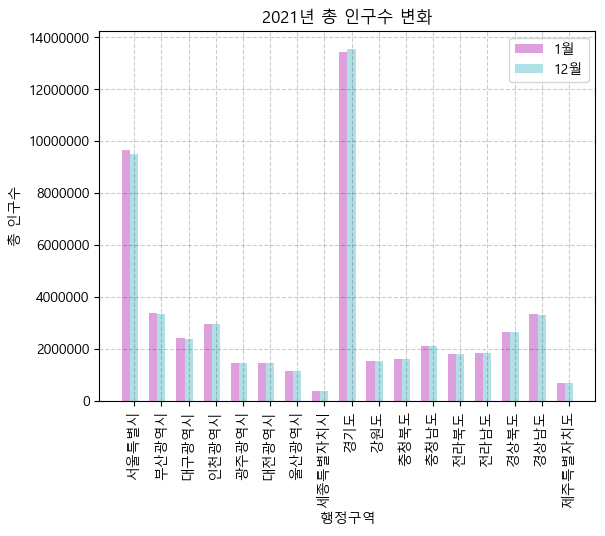

In [2]:
# 2021년 1월, 12월 인구변화
bar_width=0.3

plt.bar(x, totalpop['2021년1월_총인구수'], color='plum', width=bar_width, label='1월')
plt.bar(x+bar_width,totalpop['2021년12월_총인구수'],color='powderblue',width=bar_width, label='12월')

plt.grid(True, color='black', alpha=0.2, linestyle='--')
plt.ticklabel_format(axis="y", style="plain")
plt.xticks(x+bar_width, manpop['행정구역'])
plt.xlabel('행정구역')
plt.ylabel('총 인구수')
plt.title('2021년 총 인구수 변화')
plt.legend()
plt.xticks(rotation=90)
plt.show()

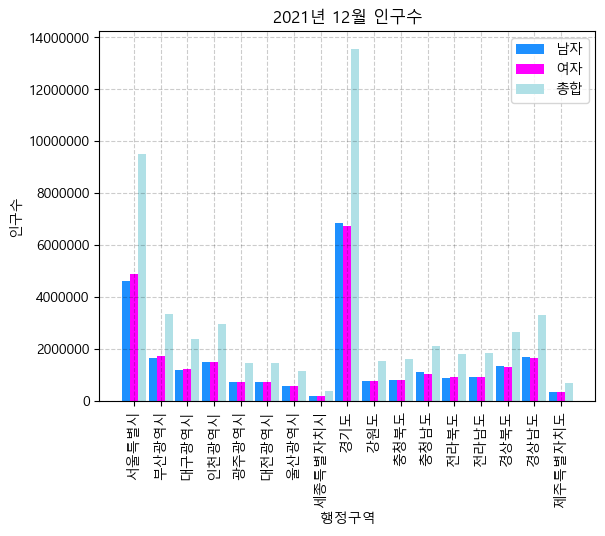

In [3]:
# 2021년 1월달 남자인구수, 여자인구수, 총 인구수
bar_width=0.3

plt.bar(x, manpop['2021년12월_남자 인구수'], color='dodgerblue', width=bar_width, label='남자')
plt.bar(x+bar_width,womanpop['2021년12월_여자 인구수'],color='magenta',width=bar_width, label='여자')
plt.bar(x+bar_width+bar_width,totalpop['2021년12월_총인구수'],color='powderblue',width=bar_width, label='총합')

plt.grid(True, color='black', alpha=0.2, linestyle='--')
plt.ticklabel_format(axis="y", style="plain")
plt.xticks(x+bar_width, manpop['행정구역'])
plt.xlabel('행정구역')
plt.ylabel('인구수')
plt.title('2021년 12월 인구수')
plt.legend()
plt.xticks(rotation=90)
plt.show()


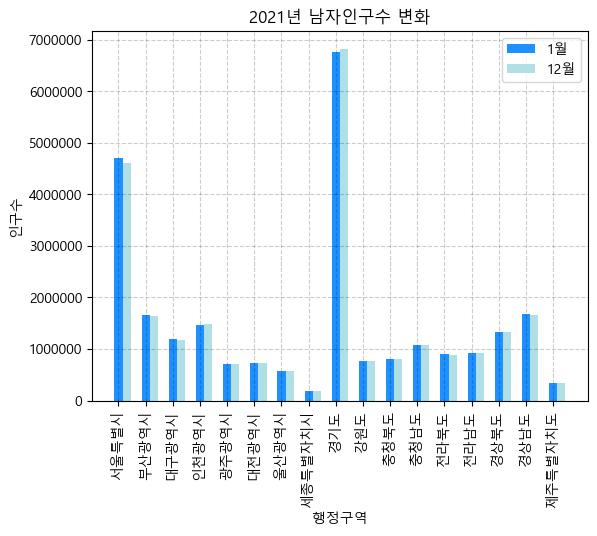

In [4]:
# 2021년 남자인구수 변화
bar_width=0.3

plt.bar(x, manpop['2021년1월_남자 인구수'], color='dodgerblue', width=bar_width, label='1월')
plt.bar(x+bar_width,manpop['2021년12월_남자 인구수'],color='powderblue',width=bar_width, label='12월')

plt.grid(True, color='black', alpha=0.2, linestyle='--')
plt.ticklabel_format(axis="y", style="plain")
plt.xticks(x, manpop['행정구역'])
plt.xlabel('행정구역')
plt.ylabel('인구수')
plt.title('2021년 남자인구수 변화')
plt.legend()
plt.xticks(rotation=90)
plt.show()

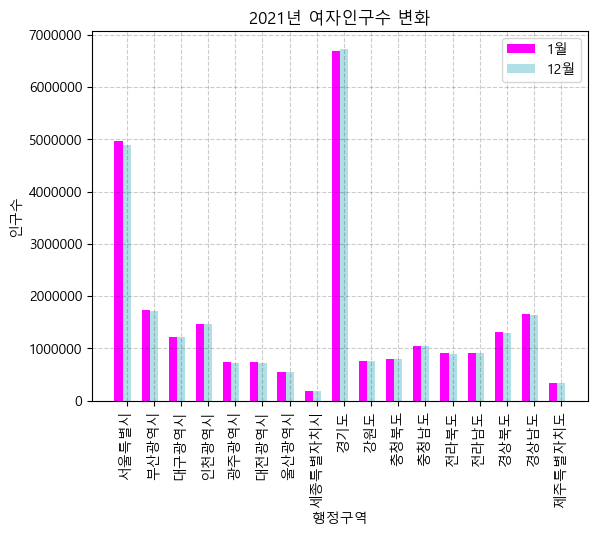

In [5]:
# 2021년 여자인구수 변화
bar_width=0.3

plt.bar(x, womanpop['2021년1월_여자 인구수'], color='magenta', width=bar_width, label='1월')
plt.bar(x+bar_width,womanpop['2021년12월_여자 인구수'],color='powderblue',width=bar_width, label='12월')
plt.grid(True, color='black', alpha=0.2, linestyle='--')
plt.ticklabel_format(axis="y", style="plain")
plt.xticks(x+bar_width, womanpop['행정구역'])
plt.xlabel('행정구역')
plt.ylabel('인구수')
plt.title('2021년 여자인구수 변화')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [6]:
# 남자, 여자 데이터프레임 병합 (월별 남자,여자 인구수 총합을 구하기 위함)
man_woman_all = pd.merge(manpop,womanpop)

In [ ]:
# 17번째 인덱스 추가( 총합을 삽입할 인덱스)
man_woman_all.loc['17']=0
# 인구수의 총합을 계산해서 17번째 인덱스에 저장
man_woman_all.loc['17']=man_woman_all.sum(axis=0)
# NaN값을 '총합'으로 변경
man_woman_all['행정구역'].fillna('총합',inplace=True)
#2021년 1월~12월까지의 남자 인구수, 여자 인구수, 총합 데이터
man_woman_all

In [ ]:
# 1월 인구수 총합 데이터 추출
man_woman_all[['2021년1월_남자 인구수','2021년1월_여자 인구수']]['17':'17']

In [ ]:
# 1월 남여 총합 인구수 데이터프레임 생성
jantotal = pd.DataFrame(
{
    '월별':['2021년1월_남자 인구수','2021년1월_여자 인구수'],
    '총합':[25838512,25987420]
},index = [1,2] # 행 인덱스
)
jantotal

In [ ]:
# 12월 인구수 총합 데이터 추출
man_woman_all[['2021년12월_남자 인구수','2021년12월_여자 인구수']]['17':'17']

In [ ]:
# 12월 남여 총합 인구수 데이터프레임 생성
dectotal = pd.DataFrame(
{
    '월별':['2021년12월_남자 인구수','2021년12월_여자 인구수'],
    '총합':[25746684,25892125]
},index = [1,2] # 행 인덱스
)
dectotal

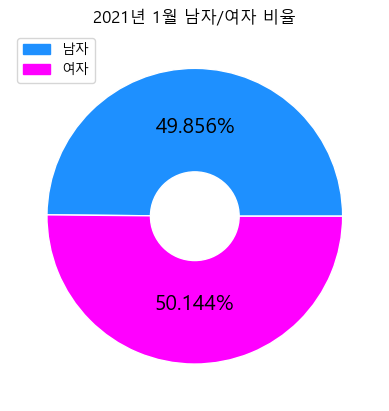

1    25838512
2    25987420
Name: 총합, dtype: int64

In [12]:
#1월달 남여 비율
janratio = jantotal['총합']
janlabels = jantotal['월별']

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}
colors = ['dodgerblue', 'magenta']
variable_x = mpatches.Patch(color='dodgerblue',label='남자')
variable_y = mpatches.Patch(color='magenta',label='여자')
plt.pie(janratio, autopct='%.3f%%', colors=colors, wedgeprops=wedgeprops,textprops={'fontsize':15})
plt.legend(loc='upper left',fontsize=10,handles=[variable_x, variable_y])
plt.title('2021년 1월 남자/여자 비율')
plt.show()
janratio

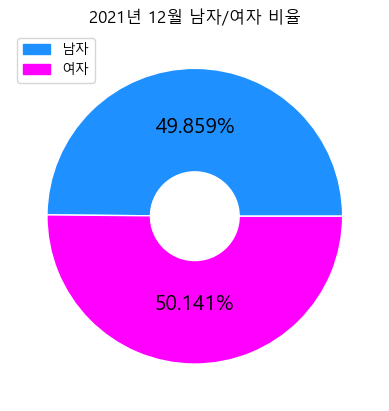

In [13]:
#12월달 남여비율
decratio = dectotal['총합']
declabels = dectotal['월별']

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}
colors = ['dodgerblue', 'magenta']
variable_x = mpatches.Patch(color='dodgerblue',label='남자')
variable_y = mpatches.Patch(color='magenta',label='여자')
plt.pie(decratio, autopct='%.3f%%', colors=colors, wedgeprops=wedgeprops,textprops={'fontsize':15})
plt.legend(loc='upper left',fontsize=10,handles=[variable_x, variable_y])
plt.title('2021년 12월 남자/여자 비율')
decratio
plt.show()

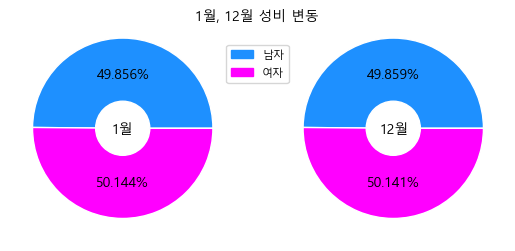

In [14]:
# 1월달, 12월달 남녀 성비 변동
fig, axes = plt.subplots(1,2)

colors = ['dodgerblue', 'magenta']

plt.text(-2.2, 1.2, '1월, 12월 성비 변동')

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}
variable_x = mpatches.Patch(color='dodgerblue',label='남자')
variable_y = mpatches.Patch(color='magenta',label='여자')
axes[0].pie(jantotal['총합'], autopct='%.3f%%', colors=colors, wedgeprops=wedgeprops)
axes[1].pie(dectotal['총합'], autopct='%.3f%%', colors=colors, wedgeprops=wedgeprops)
plt.text(-3.12, -0.05, '1월')
plt.text(-0.15, -0.05, '12월')
plt.legend(loc=(-0.25, 1.0),fontsize=8,handles=[variable_x, variable_y],bbox_to_anchor=(-0.24,0.7))
plt.show()

<BarContainer object of 8 artists>

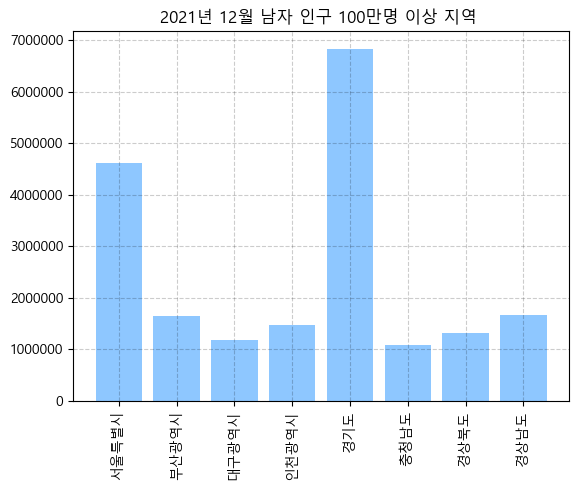

In [15]:
# 2021년 남자 인구 100만명 이상 지역

tenm_df= manpop[manpop['2021년12월_남자 인구수'] >= 1000000][['행정구역', '2021년12월_남자 인구수']]
tenm_df 

plt.grid(True, color='black', alpha=0.2, linestyle='--')
plt.title('2021년 12월 남자 인구 100만명 이상 지역 ')
plt.ticklabel_format(axis="y", style="plain")
plt.xticks(rotation=90)
plt.bar(tenm_df['행정구역'], tenm_df['2021년12월_남자 인구수'], color='dodgerblue', alpha=0.5)

<BarContainer object of 8 artists>

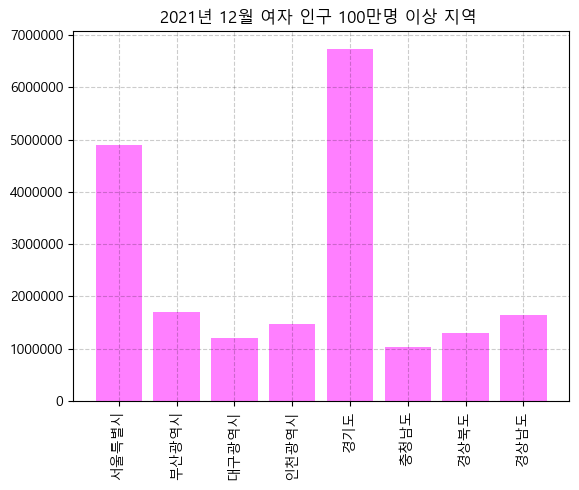

In [16]:
# 2021년 여자 인구 100만명 이상 지역
tenwm_df= womanpop[womanpop['2021년12월_여자 인구수'] >= 1000000][['행정구역', '2021년12월_여자 인구수']]
tenwm_df 

plt.grid(True, color='black', alpha=0.2, linestyle='--')
plt.title('2021년 12월 여자 인구 100만명 이상 지역 ')
plt.ticklabel_format(axis="y", style="plain")
plt.xticks(rotation=90)
plt.bar(tenwm_df['행정구역'], tenwm_df['2021년12월_여자 인구수'], color='magenta', alpha=0.5)

In [ ]:
# 2021년 월별 남자 총 인구수 구하기
months = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
man_total_data_list = []
for month in months:
    column_name = f'2021년{month}_남자 인구수'
    man_total_data_list.append(manpop[column_name].sum())
man_total_data_list

In [ ]:
# 2021년 월별 여자 총 인구수 구하기
months = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
woman_total_data_list = []
for month in months:
    column_name = f'2021년{month}_여자 인구수'
    woman_total_data_list.append(womanpop[column_name].sum())
woman_total_data_list

Text(0.5, 1.0, '2021년 남자 총 인구수 변동')

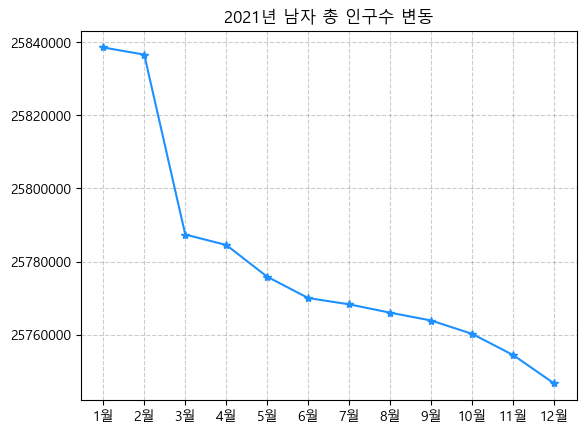

In [19]:
# 2021년 월별 남자 총 인구수 변동

plt.grid(True, color='black', alpha=0.2, linestyle='--')
plt.ticklabel_format(axis="y", style="plain")
plt.plot(months, man_total_data_list, color = 'dodgerblue', marker = '*')
plt.title('2021년 남자 총 인구수 변동')

Text(0.5, 1.0, '2021년 여자 총 인구수 변동')

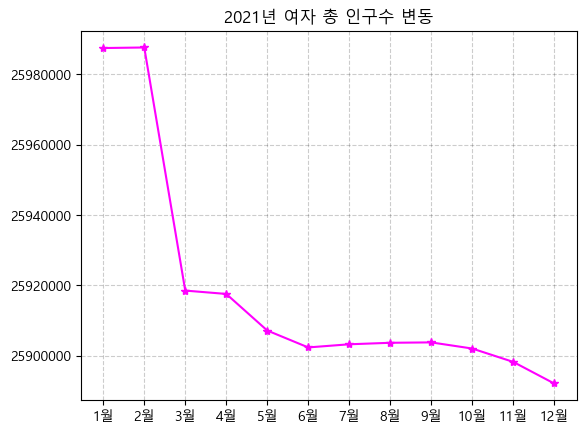

In [20]:
# 2021년 월별 여자 총 인구수 변동

plt.grid(True, color='black', alpha=0.2, linestyle='--')
plt.ticklabel_format(axis="y", style="plain")
plt.plot(months, woman_total_data_list, color = 'magenta', marker = '*')
plt.title('2021년 여자 총 인구수 변동')

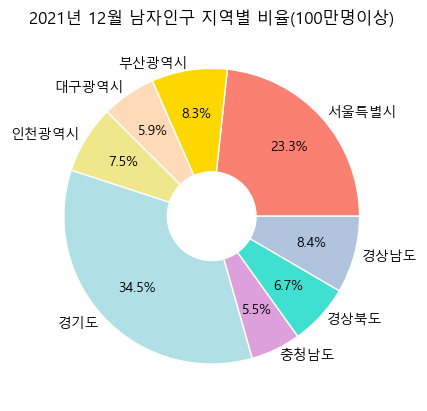

0     4618040
1     1639044
2     1175632
3     1476373
8     6827298
11    1083366
14    1323661
15    1668338
Name: 2021년12월_남자 인구수, dtype: int64

In [21]:
# 2021년 남자 인구 지역별 비율(100만명 이상)
ratio_ms = tenm_df['2021년12월_남자 인구수']
labels_ms = tenm_df['행정구역']
colors = ['salmon', 'gold', 'peachpuff', 'khaki','powderblue','plum','turquoise','lightsteelblue']

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}
plt.title('2021년 12월 남자인구 지역별 비율(100만명이상)')

plt.pie(ratio_ms, labels=labels_ms, autopct='%.1f%%', wedgeprops=wedgeprops, colors=colors,pctdistance=0.7,labeldistance=1.05)
plt.show()
ratio_ms

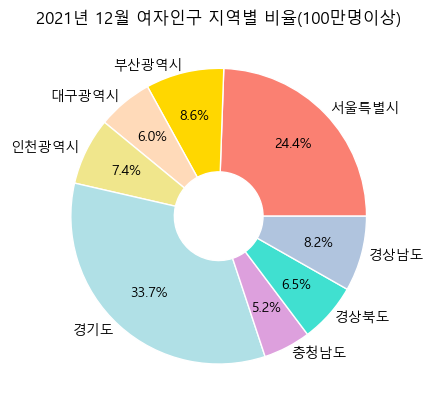

0     4891418
1     1711336
2     1209780
3     1472002
8     6738152
11    1035891
14    1302948
15    1645845
Name: 2021년12월_여자 인구수, dtype: int64

In [22]:
# 2021년 여자 인구 지역별 비율(100만명 이상)
ratio_wms = tenwm_df['2021년12월_여자 인구수']
labels_wms = tenwm_df['행정구역']
colors = ['salmon', 'gold', 'peachpuff', 'khaki','powderblue','plum','turquoise','lightsteelblue']

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}
plt.title('2021년 12월 여자인구 지역별 비율(100만명이상)')
plt.pie(ratio_wms, labels=labels_wms, autopct='%.1f%%', wedgeprops=wedgeprops, colors=colors, pctdistance=0.7,labeldistance=1.05)
plt.show()
ratio_wms

Text(0.5, 1.0, '2021 남자/여자 총 인구수 변동')

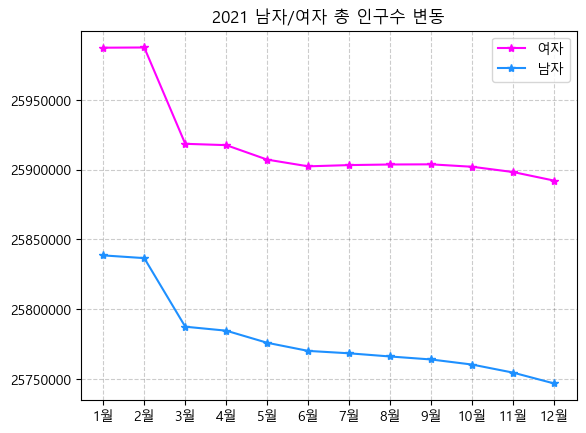

In [23]:
# 2021년 월별 남자, 여자 총 인구수 변동
plt.ticklabel_format(axis="y", style="plain")
plt.grid(True, color='black', alpha=0.2, linestyle='--')
plt.plot(months, woman_total_data_list, label='여자', color = 'magenta', marker = '*')
plt.plot(months, man_total_data_list, label='남자', color = 'dodgerblue', marker = '*')
plt.legend()

plt.title('2021 남자/여자 총 인구수 변동')

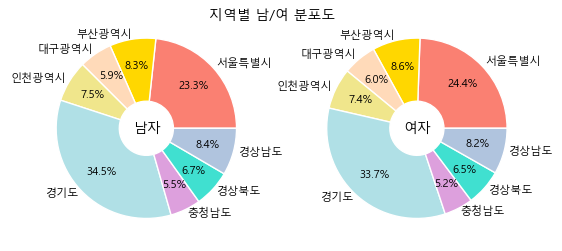

In [24]:
# 2021년 지역별 남/여 분포도 - 100만명 이상인 도시
fig, axes = plt.subplots(1,2)

colors = ['salmon', 'gold', 'peachpuff', 'khaki','powderblue','plum','turquoise','lightsteelblue']
plt.text(-2.3, 1.2, '지역별 남/여 분포도')
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}

axes[0].pie(ratio_ms, labels=labels_ms, autopct='%.1f%%', wedgeprops=wedgeprops, colors=colors, pctdistance=0.7,textprops={'fontsize':8},labeldistance=1.05)
axes[1].pie(ratio_wms, labels=labels_wms, autopct='%.1f%%', wedgeprops=wedgeprops, colors=colors, pctdistance=0.7,textprops={'fontsize':8},labeldistance=1.05)
plt.text(-3.15, -0.05, '남자')
plt.text(-0.15, -0.05, '여자')
plt.show()
